In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.shape

(200, 5)

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#univariate analysis
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 200 observations with 5 features.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
# Finding the number of males and females in the data
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

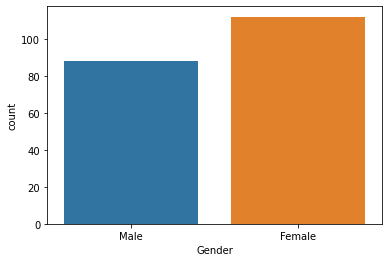

In [11]:
# Visualising the number of males and females in the data
sns.countplot(x="Gender",data=df,palette="tab10")
plt.show()

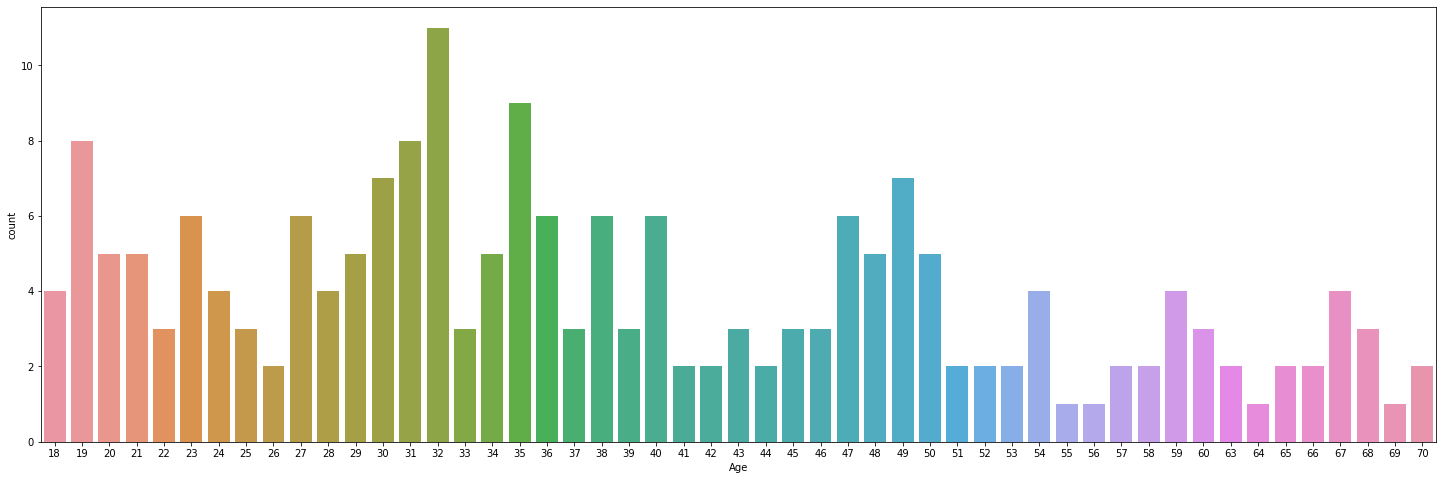

In [12]:
# Visualising the age distribution of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Age",data=df)
plt.show()

In [13]:
# Computing minimum and maximum age of customers
print(min(df.Age))
print(max(df.Age))

18
70


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

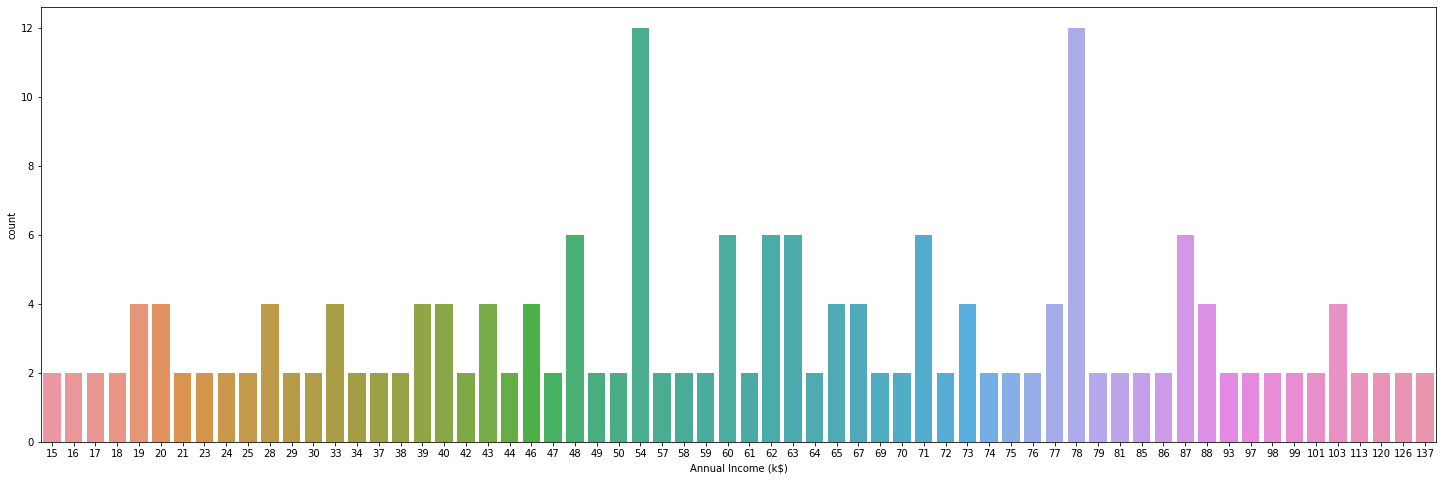

In [14]:
# Visualising the Income distribution of customers
plt.figure(figsize=(25,8))

sns.countplot(x="Annual Income (k$)",data=df)

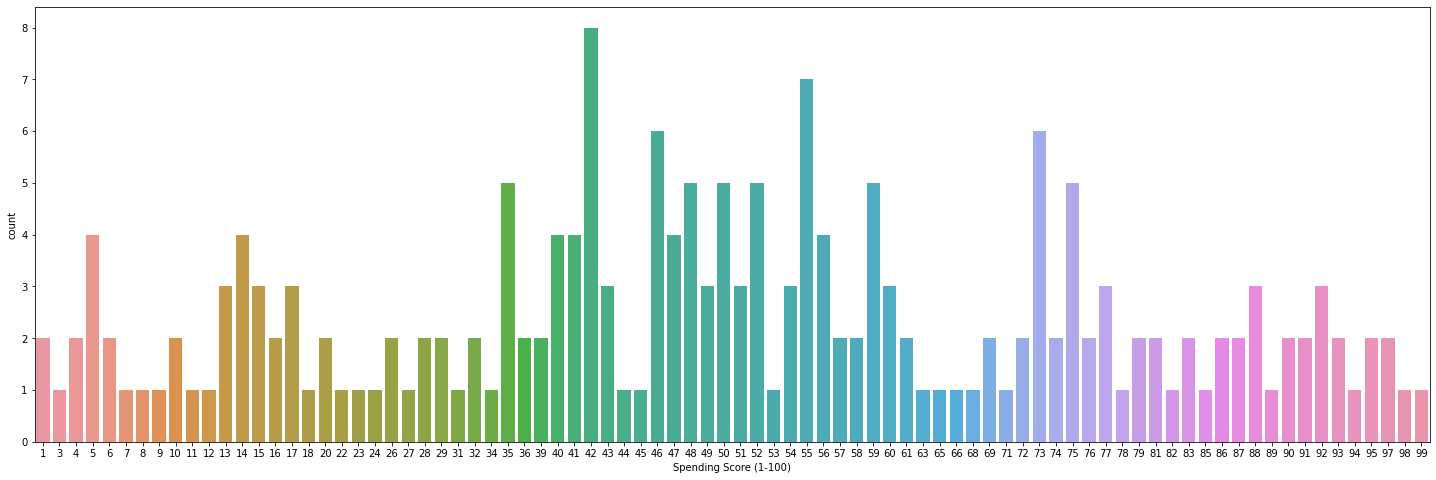

In [15]:
# Visualising the Spending score of customers
plt.figure(figsize=(25,8))
sns.countplot(x="Spending Score (1-100)",data=df)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

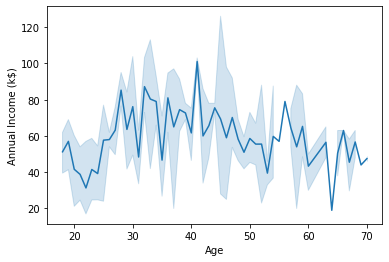

In [16]:
#bi-variate analysis
sns.lineplot(x = df["Age"], y=df["Annual Income (k$)"], palette ="bright")

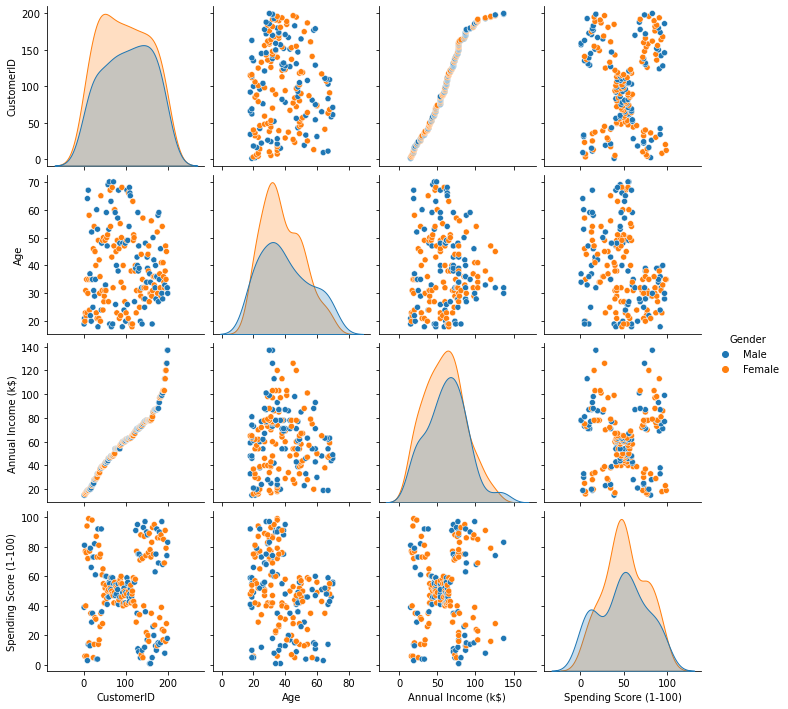

In [17]:
sns.pairplot(df,hue='Gender',diag_kind='kde')
plt.show()

<AxesSubplot:>

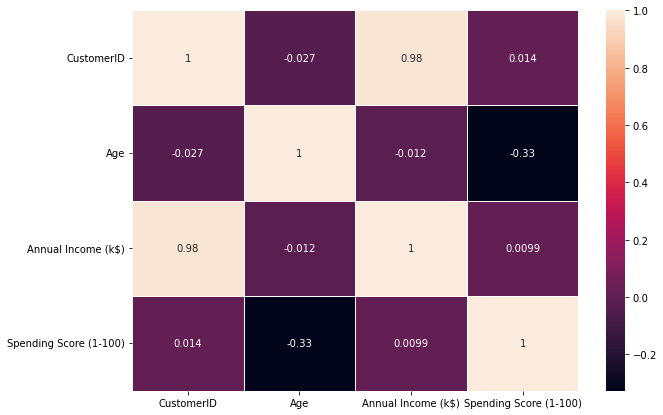

In [18]:
#multi-variate analysis
# Finding correaltion between all the parameters in the dataset.
lw = 0.8
lc = "white"

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,linewidth= lw)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.groupby('Gender')[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().sort_values('Age')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [22]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [23]:
df.kurt()

CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [24]:
# Missing values in dataset 

missing_values = df.isnull().sum().sort_values(ascending = False)

In [25]:
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:ylabel='CustomerID'>

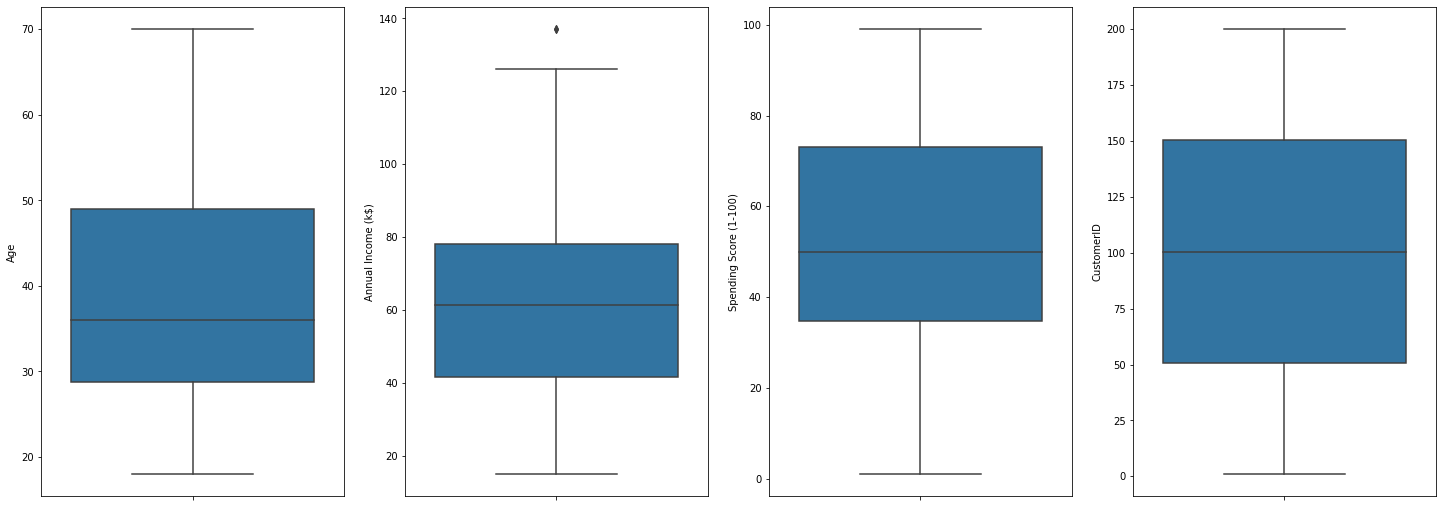

In [26]:
#identifying the outliers and replacing them
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows= 1, ncols = 4, figsize = (25,9))
sns.boxplot(ax = ax1, y = 'Age', data = df)
sns.boxplot(ax = ax2, y = 'Annual Income (k$)', data = df)
sns.boxplot(ax = ax3, y = 'Spending Score (1-100)', data = df)
sns.boxplot(ax = ax4, y = 'CustomerID', data = df)

In [27]:
#encoding
#Numerical and Ctegorical Features

numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [28]:
categorical_features

Index(['Gender'], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
# Transform data
df['Gender'] = encoder.fit_transform(df['Gender'])

In [31]:
df.head(6).T

,0,1,2,3,4,5
CustomerID,1,2,3,4,5,6
Gender,1,1,0,0,0,0
Age,19,21,20,23,31,22
Annual Income (k$),15,15,16,16,17,17
Spending Score (1-100),39,81,6,77,40,76


In [32]:
#scale the data 
X = df.iloc[:,3:5]
Y = df["Spending Score (1-100)"]

In [33]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [35]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

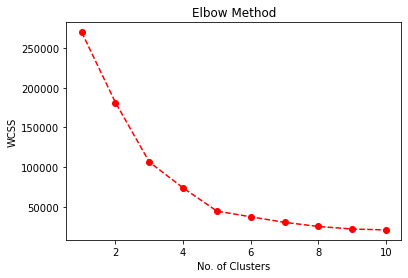

In [39]:
# Visualising elbow method
k =list(range(1,11))
plt.plot(k,wcss,'ro--')
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [40]:
# creating object kmeans of class KMeans()
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)

In [41]:
#To cluster the data into its respective cluster from 0 to 4
y_means=kmeans.fit_predict(X)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

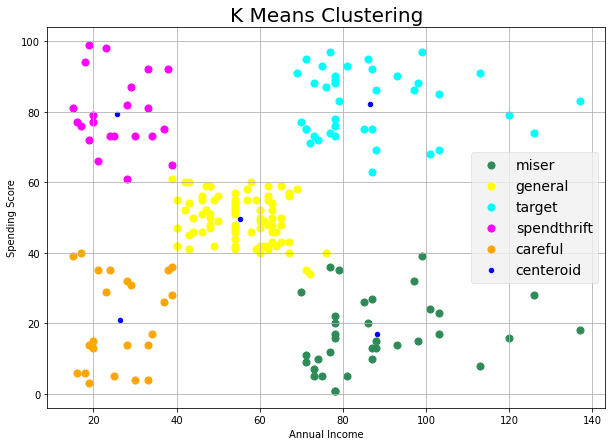

In [42]:
plt.figure(figsize=(10,7))
x = np.array(X)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'seagreen', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange', label = 'careful')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 20, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [43]:
cl = pd.Series(y_means)

In [44]:
df['Cluster'] = cl 

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [46]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0
199,200,1,30,137,83,2


In [47]:
dm =pd.get_dummies(df,columns = ['Gender'])

In [48]:
dm.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
0,1,19,15,39,4,0,1
1,2,21,15,81,3,0,1
2,3,20,16,6,4,1,0
3,4,23,16,77,3,1,0
4,5,31,17,40,4,1,0


In [49]:
y =dm['Age']

In [50]:
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [51]:
x =dm.drop(columns = 'Age', axis =1)

In [52]:
x.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
0,1,15,39,4,0,1
1,2,15,81,3,0,1
2,3,16,6,4,1,0
3,4,16,77,3,1,0
4,5,17,40,4,1,0


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [54]:
x_train.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
131,132,71,75,2,0,1
96,97,60,47,1,1,0
181,182,97,86,2,1,0
19,20,23,98,3,1,0
153,154,78,76,2,1,0


In [55]:
y_train.head()

131    39
96     47
181    32
19     35
153    38
Name: Age, dtype: int64

In [56]:
x_test.head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster,Gender_0,Gender_1
18,19,23,29,4,0,1
170,171,87,13,0,0,1
107,108,63,46,1,0,1
98,99,61,42,1,0,1
177,178,88,69,2,0,1


In [57]:
y_test.head()

18     52
170    40
107    54
98     48
177    27
Name: Age, dtype: int64